## About dataset
It is taken from Kaggle. It has various characteristics of consumers such as customer name, customer email, country, gender, age, annual salary, credit card debt, and net worth. Based on these features we have to estimate the overall amount that consumers would spend on purchasing a car.

Dataset link: https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction

## Problem statement
To predict price of a car (regression)

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
# Importing original data
data = pd.read_csv('car_purchasing.csv', encoding = 'ISO-8859-1')
# Saving a copy of data
df = data.copy()
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## Explore data

In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
# Check missing values
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()

0

## Observation
* There are 500 rows and 9 columns.
* There are neither any missing values nor any duplicates.
* There are three categorical columns and rest are numerical.

## Data preprocessing

* ### Drop unnecessary columns

As columns 'customer name' and 'customer e-mail' are not required to predict price of a car, I will drop them. 

In [7]:
df.drop(['customer name', 'customer e-mail'], axis = 1, inplace = True)

* ### Convert categorical column into numerical
As there is only one categorical column 'country', let's encode it using label encoder.

In [8]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['country'] = enc.fit_transform(df['country'])

In [9]:
# Review data
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,27,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,17,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,41,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,26,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## Data visualization

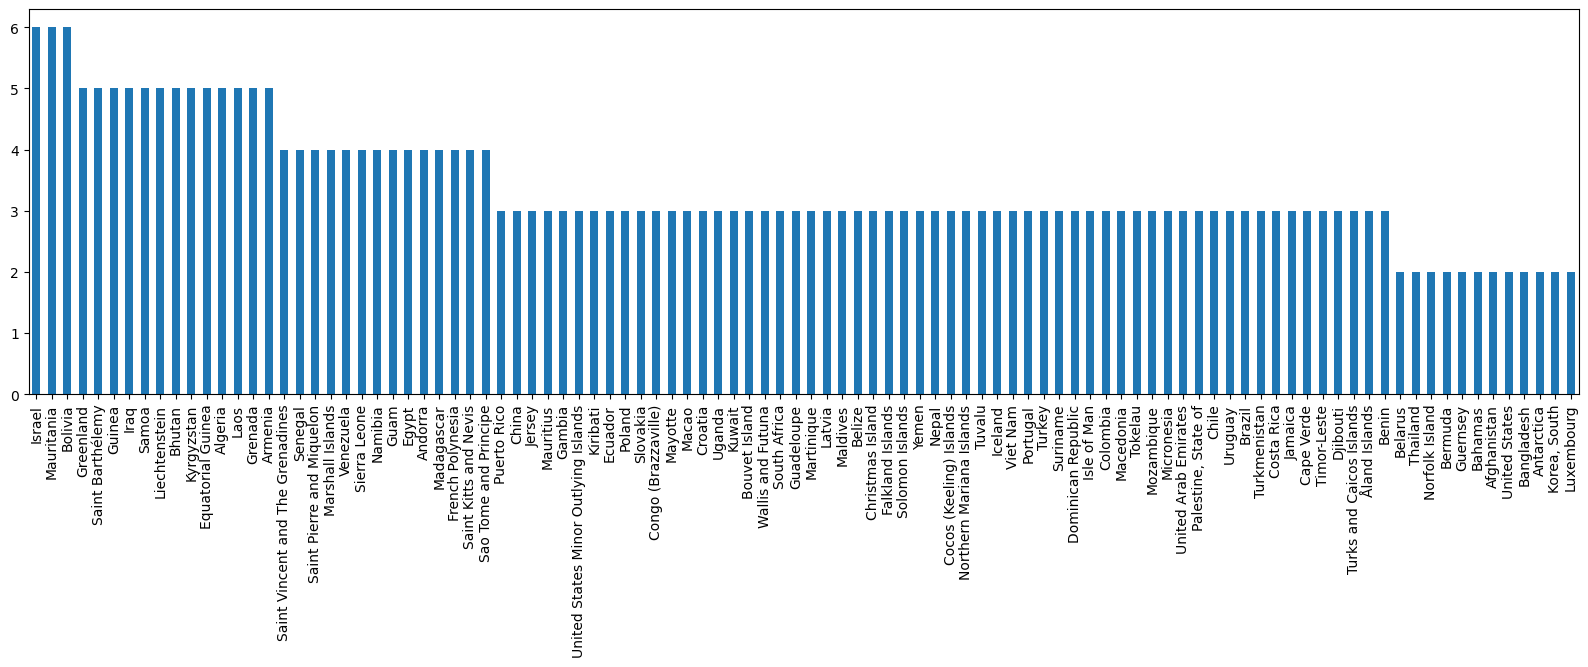

In [10]:
plt.figure(figsize=(20,5))
data['country'].value_counts()[:100].plot(kind = 'bar')
plt.xticks(rotation=90)
plt.show()

Israel, Mauritania and Bolivia have maximum car buyers.

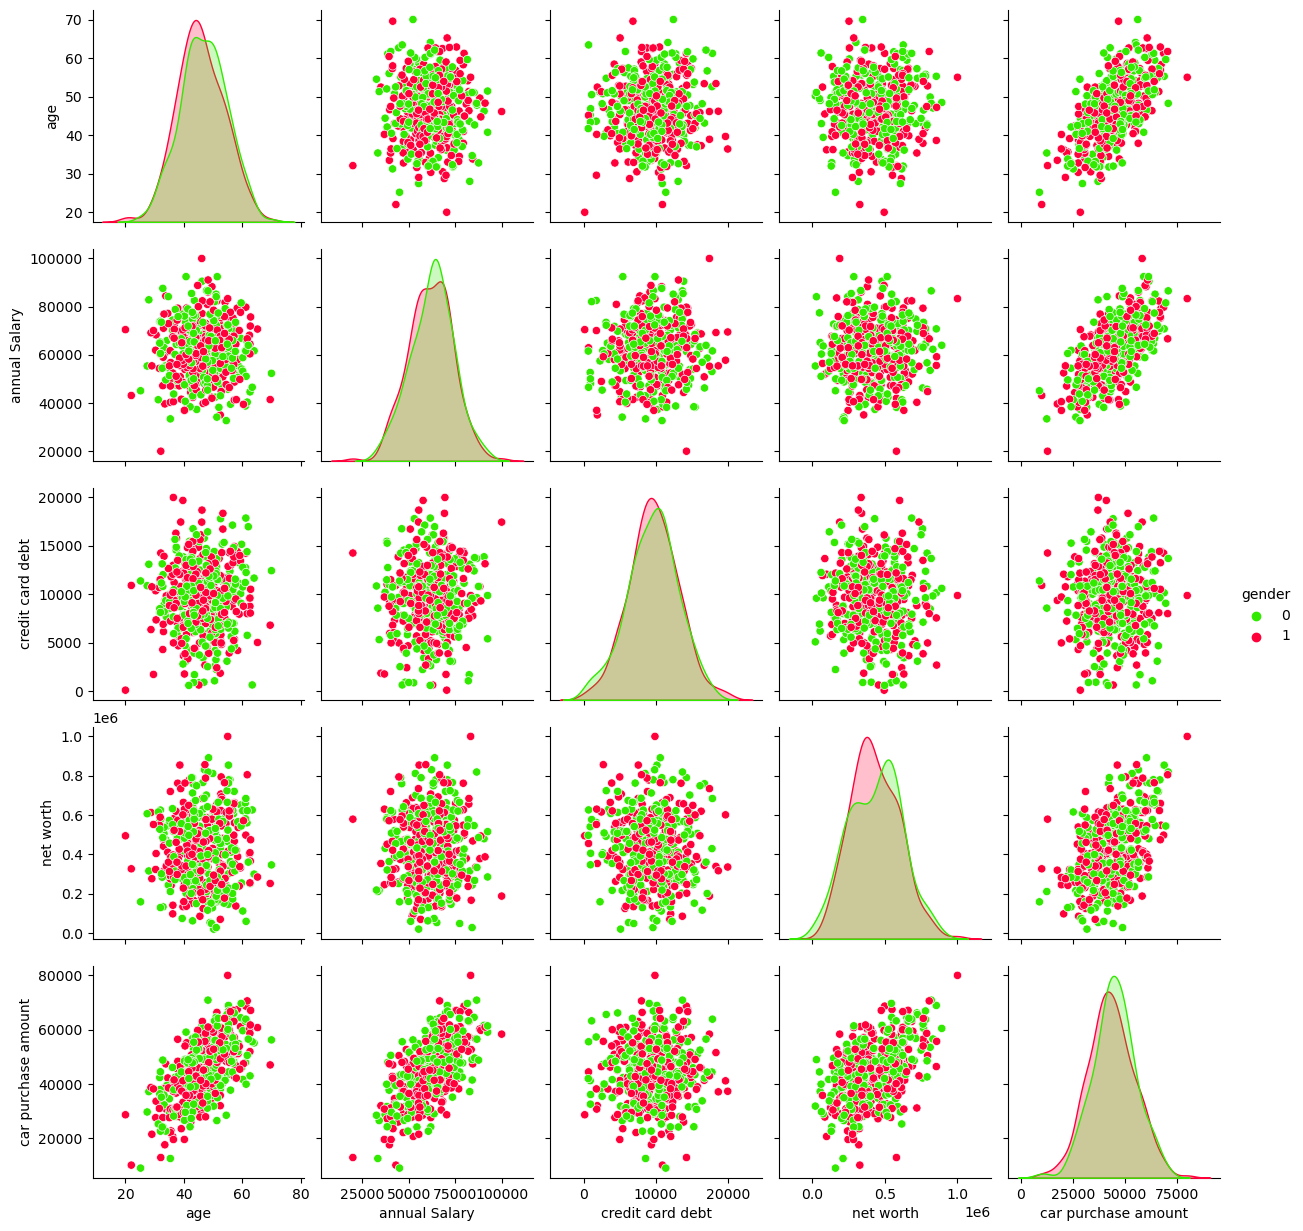

In [11]:
sns.pairplot(df.iloc[:,1:], hue='gender', data = df, palette = 'prism')

The target column 'car purchase amount' has linear relation with annual salary as well as age.

<AxesSubplot:>

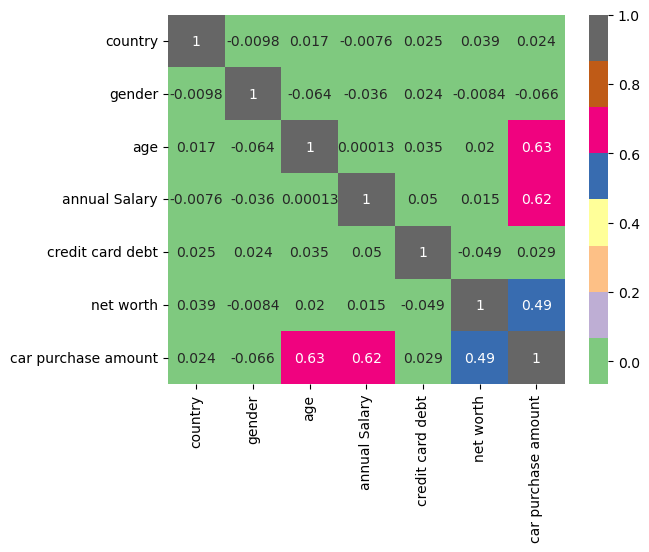

In [12]:
sns.heatmap(df.corr(), annot = True, cmap = 'Accent')

The target column 'car purchase amount' has strong positive correlation with age and annual salary.

<AxesSubplot:ylabel='gender'>

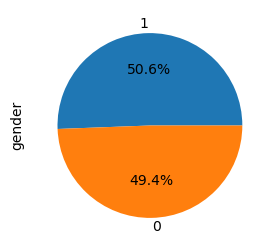

In [13]:
plt.figure(figsize=(3,3))
df['gender'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

There are nearly same number of males and females in the dataset.

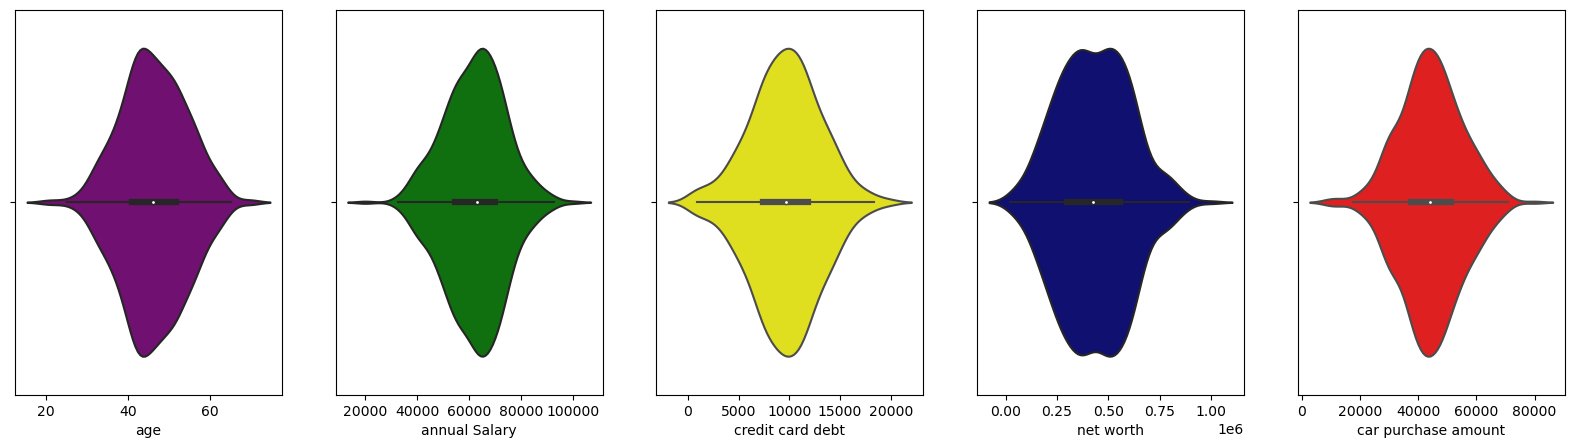

In [14]:
col = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']
colors = ['purple', 'green', 'yellow','navy', 'red']

plt.figure(figsize=(20,5))

for i in range(5):
    plt.subplot(1,5,1+i)
    sns.violinplot(df[col[i]], color = colors[i])
plt.show()

* Average car purchase amount is 40,000 dollars.
* Average age of customers is greater than 40 years.
* Customers have salary higher than 50,000 dollars. Their net worth is concentrated in between 200,000 to 600,000 dollars. 
* Customers have average debt of 10,000 dollars.

## Building Model: Gradient Boosting Regressor

In [15]:
# Define x & y
x = df.iloc[:,:-1]
y = df['car purchase amount']

In [16]:
# Splitting data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.35, random_state=32)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [18]:
# Initialize model
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()
# Fitting training data
gb_reg.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [19]:
# Prediction 
ypred = gb_reg.predict(xtest)

In [20]:
# Evaluate model using sklearn metrics
from sklearn.metrics import mean_squared_error, r2_score
print('MSE: ', mean_squared_error(ytest,ypred))
print('R2 score: ', r2_score(ytest,ypred))

MSE:  5353076.79558672
R2 score:  0.9608441389808653


### As R2 score is close to 1, it is a good model.